In [ ]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

In [ ]:
def fetch_csv(file_id):
    url = f'https://drive.google.com/uc?id={file_id}&export=download'
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(io.StringIO(response.content.decode('utf-8')))
    else:
        print(f"Error fetching the file with ID: {file_id}")
        return None

customers_id = '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_id = '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_id = '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers_df = fetch_csv(customers_id)
products_df = fetch_csv(products_id)
transactions_df = fetch_csv(transactions_id)

In [ ]:
print(customers_df.head(), "\n")
print(products_df.head(), "\n")
print(transactions_df.head(), "\n")

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

In [ ]:
print("Missing Values in Customers Data:")
print(customers_df.isnull().sum(), "\n")

print("Missing Values in Products Data:")
print(products_df.isnull().sum(), "\n")

print("Missing Values in Transactions Data:")
print(transactions_df.isnull().sum(), "\n")

Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [ ]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [ ]:
transactions_df = transactions_df.merge(customers_df, on='CustomerID', how='left', suffixes=('_transaction', '_customer'))
transactions_df = transactions_df.merge(products_df, on='ProductID', how='left', suffixes=('', '_product'))

transactions_df['Revenue'] = transactions_df['Quantity'] * transactions_df['Price']

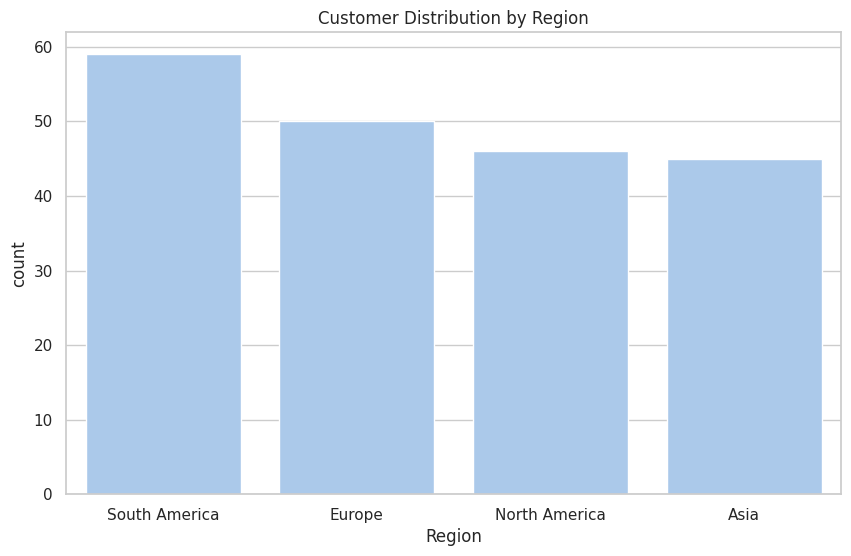

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.show()

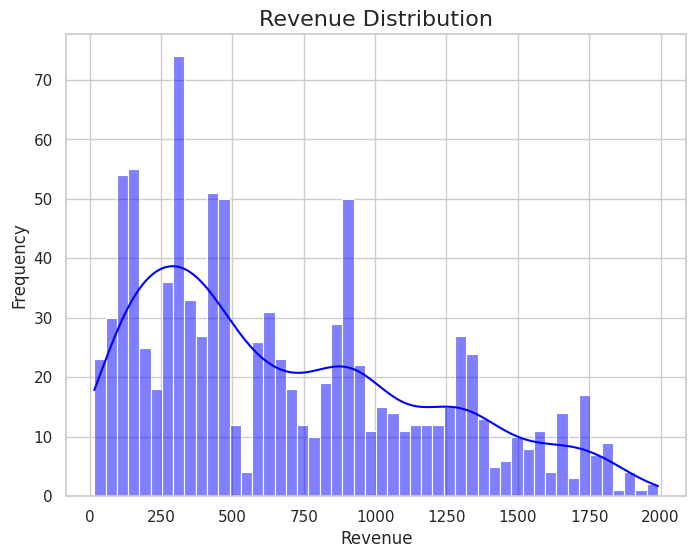

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(transactions_df['Revenue'], kde=True, bins=50, color='blue')
plt.title('Revenue Distribution', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

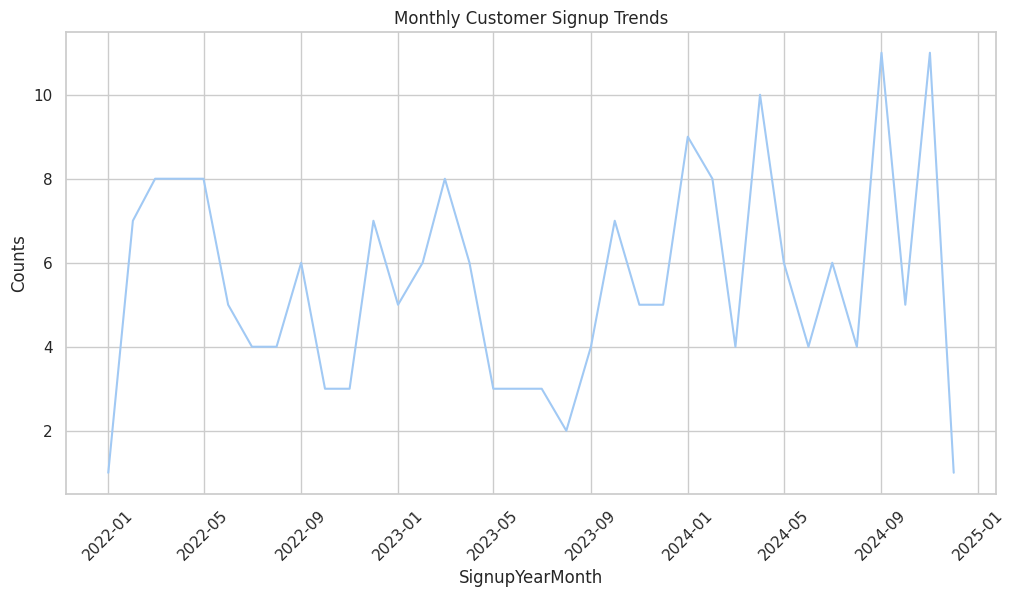

In [ ]:
customers_df['SignupYearMonth'] = customers_df['SignupDate'].dt.to_period('M')
signup_trend = customers_df.groupby('SignupYearMonth').size().reset_index(name='Counts')
signup_trend['SignupYearMonth'] = signup_trend['SignupYearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trend, x='SignupYearMonth', y='Counts')
plt.title("Monthly Customer Signup Trends")
plt.xticks(rotation=45)
plt.show()

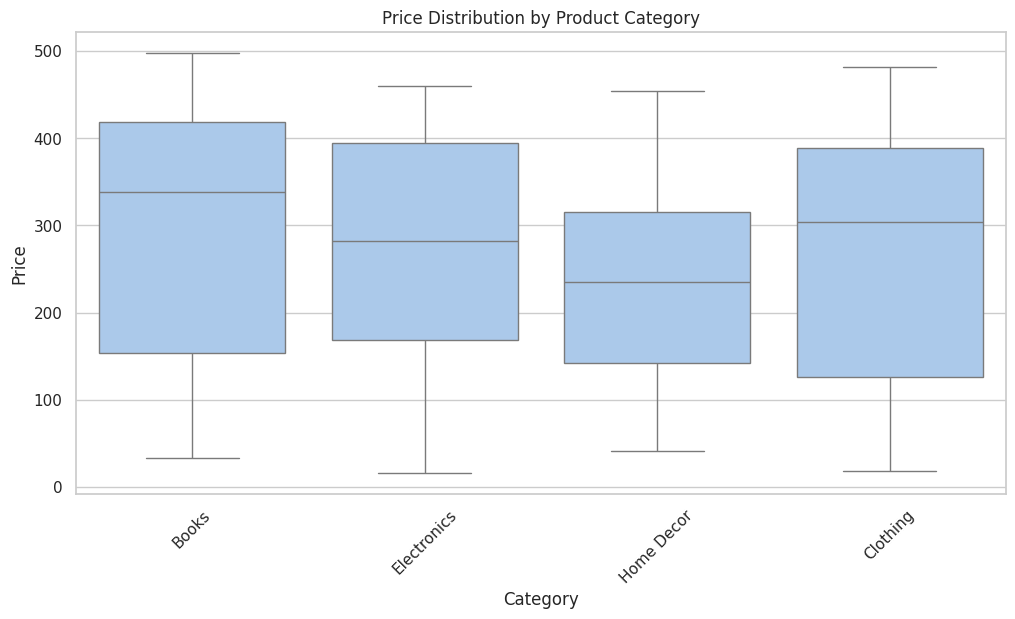

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=products_df, x='Category', y='Price')
plt.title("Price Distribution by Product Category")
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-988abf4949c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


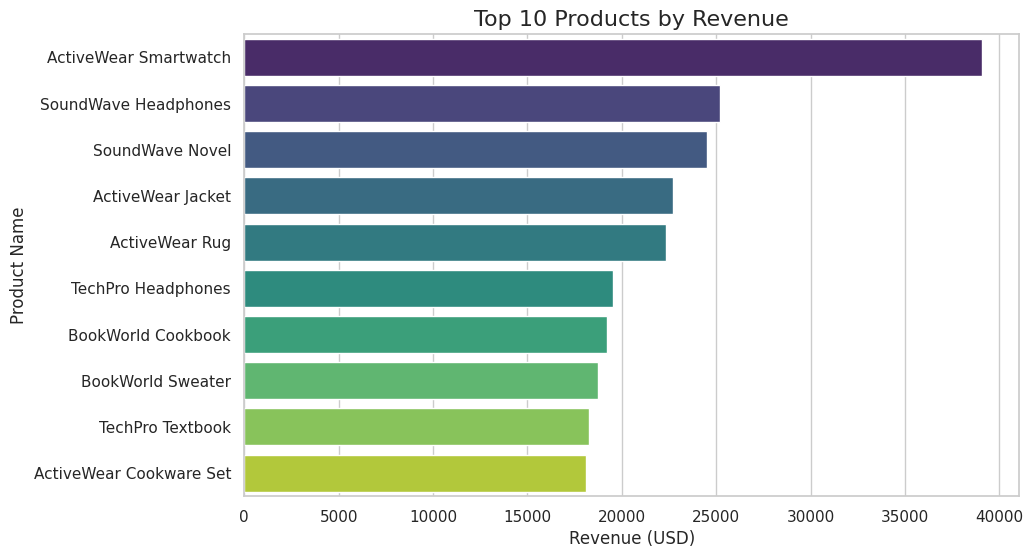

In [ ]:
# Top 10 Products by Revenue
top_products = transactions_df.groupby('ProductName_x')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

In [ ]:
avg_revenue = transactions_df['Revenue'].mean()
median_revenue = transactions_df['Revenue'].median()
avg_price = transactions_df['Price'].mean()
median_price = transactions_df['Price'].median()
avg_quantity = transactions_df['Quantity'].mean()
median_quantity = transactions_df['Quantity'].median()

customer_revenue = transactions_df.groupby('CustomerID')['Revenue'].sum()
avg_revenue_per_customer = customer_revenue.mean()
median_revenue_per_customer = customer_revenue.median()


transactions_per_customer = transactions_df.groupby('CustomerID')['TransactionID'].count()
avg_transactions_per_customer = transactions_per_customer.mean()
median_transactions_per_customer = transactions_per_customer.median()


print("\n--- Key Numerical Insights ---")
print(f"1. Average Revenue per Transaction: ${avg_revenue:.2f}")
print(f"2. Median Revenue per Transaction: ${median_revenue:.2f}")
print(f"3. Average Price per Product: ${avg_price:.2f}")
print(f"4. Median Price per Product: ${median_price:.2f}")
print(f"5. Average Quantity per Transaction: {avg_quantity:.2f}")
print(f"6. Median Quantity per Transaction: {median_quantity:.2f}")
print(f"7. Average Revenue per Customer: ${avg_revenue_per_customer:.2f}")
print(f"8. Median Revenue per Customer: ${median_revenue_per_customer:.2f}")
print(f"9. Average Transactions per Customer: {avg_transactions_per_customer:.2f}")
print(f"10. Median Transactions per Customer: {median_transactions_per_customer:.2f}")



--- Key Numerical Insights ---
1. Average Revenue per Transaction: $690.00
2. Median Revenue per Transaction: $588.88
3. Average Price per Product: $272.55
4. Median Price per Product: $299.93
5. Average Quantity per Transaction: 2.54
6. Median Quantity per Transaction: 3.00
7. Average Revenue per Customer: $3467.31
8. Median Revenue per Customer: $3137.66
9. Average Transactions per Customer: 5.03
10. Median Transactions per Customer: 5.00
